In [1]:
import archetypes as arch
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/dataBittner2000.csv")
rownames = pd.read_csv("data/dataBittner2000_rownames.csv", sep=";", header=None).values.tolist()[0]
df.index = rownames
df

OSError: [Errno 45] Operation not supported

In [3]:
model = arch.BiAA(n_archetypes=(3, 2), n_init=2, max_iter=10_000, random_state=0)

In [4]:
_ = model.fit(df)

In [5]:
alphas = pd.DataFrame(model.alphas_)
alphas.index = df.index

a = alphas.idxmax(axis=1)

alphas_names = []
for i in range(model.n_archetypes[0]):
    alphas_names += alphas[a == i].sort_values(i, ascending=False).head(10).index.to_list()

In [6]:
gammas = pd.DataFrame(model.gammas_.T)
gammas.index = df.columns

g = gammas.idxmax(axis=1)

gammas_names = []
for i in range(model.n_archetypes[1]):
    gammas_names += gammas[g == i].sort_values(i, ascending=False).index.to_list()

In [1]:
cmap = sns.diverging_palette(120, 10, s=100, center="dark", as_cmap=True)

df_sort = df.loc[alphas_names, gammas_names]

g = sns.heatmap(df_sort, cmap=cmap)

_ = g.set_xticks(np.arange(len(df_sort.columns)) + 0.5)
_ = g.set_xticklabels(df_sort.columns, fontdict={'fontsize': 8})
_ = g.set_yticks(np.arange(len(df_sort.index)) + 0.5)
_ = g.set_yticklabels(df_sort.index, fontdict={'fontsize': 8})

line_color = "yellow"
_ = g.axhline(0, color=line_color)
_ = g.axhline(12, color=line_color)
_ = g.axhline(22, color=line_color)
_ = g.axhline(32, color=line_color)

_ = g.axvline(0, color=line_color)
_ = g.axvline(23, color=line_color)
_ = g.axvline(31, color=line_color)

plt.subplots_adjust(left=0.12, right=1.04, bottom=0.2, top=0.98)

plt.savefig('results/gene_expression.eps', format='eps')

plt.show()

NameError: name 'sns' is not defined

<AxesSubplot: >

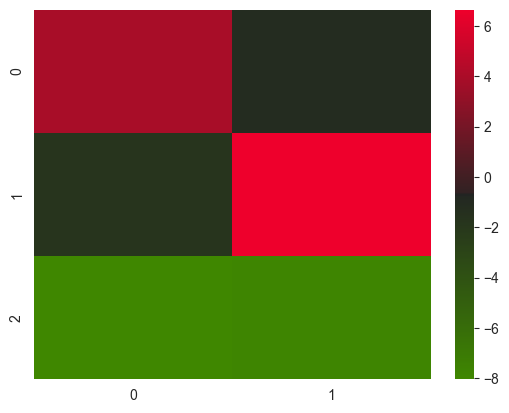

In [31]:
sns.heatmap(model.archetypes_, cmap = cmap)

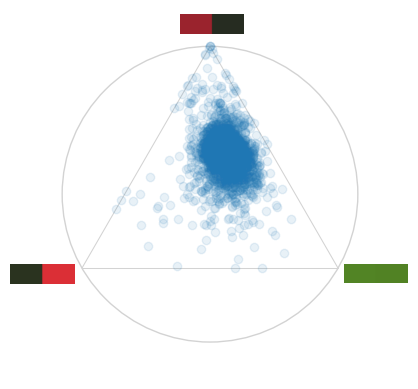

In [82]:
arch.simplex(model.alphas_, alpha=0.1, arch_labels=[""] * 3)
fig = plt.gcf()
newax = fig.add_axes([0.465, 0.77, 0.1, 0.1], anchor='NE', zorder=1)
im = plt.imread('results/garch0.png') # insert local path of the image.
newax.imshow(im)
newax.axis('off')
newax = fig.add_axes([0.2, 0.25, 0.1, 0.1], anchor='NE', zorder=1)
im = plt.imread('results/garch1.png') # insert local path of the image.
newax.imshow(im)
newax.axis('off')
newax = fig.add_axes([0.722, 0.25, 0.1, 0.1], anchor='NE', zorder=1)
im = plt.imread('results/garch2.png') # insert local path of the image.
newax.imshow(im)
newax.axis('off')

plt.savefig('results/aarch.pdf', format='pdf', bbox_inches="tight")

plt.show()

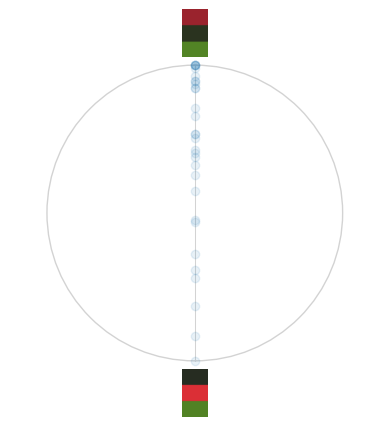

In [83]:
arch.simplex(model.gammas_.T, alpha=0.1, arch_labels=[""] * 2)

fig = plt.gcf()
newax = fig.add_axes([0.433, 0.82, 0.1, 0.1], anchor='NE', zorder=1)
im = plt.imread('results/aarch0.png') # insert local path of the image.
newax.imshow(im)
newax.axis('off')
newax = fig.add_axes([0.433, 0.07, 0.1, 0.1], anchor='NE', zorder=1)
im = plt.imread('results/aarch1.png') # insert local path of the image.
newax.imshow(im)
newax.axis('off')

plt.savefig('results/garch.pdf', format='pdf', bbox_inches='tight')

plt.show()